In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import anndata as ad
import requests
import urllib.request
import warnings

WORKING_DIR = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/check_markers"
OUTPUT_DIR = os.path.join(WORKING_DIR, "results", "Mouse_Dentate_Gyrus", "Emx1_Mut")
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory: {OUTPUT_DIR}")
os.chdir(WORKING_DIR)
sys.path.append(WORKING_DIR)

from functions import *

# This will be added by the parameterized notebook script:
# OUTPUT_DIR = os.path.join(WORKING_DIR, "results", "Mouse_Dentate_Gyrus", "Emx1_Mut")
# os.makedirs(OUTPUT_DIR, exist_ok=True)

# %% [markdown]
# # Define gene sets

Output directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/check_markers/results/Mouse_Dentate_Gyrus/Emx1_Mut


In [2]:
gene_list = pd.read_csv("FirstLevelGeneList.csv")
gene_list

# %% [markdown]
# # Load data

,Excitatory neurons,Inhibitory neurons,Astrocytes,Microglia,Oligos,Endothelial cells,Ependymal cells,Neuroblast/progenitors
0,Slc17a7,Gad1,Aldh1l1,Aif1,Mbp,Cldn5,Foxj1,Sox4
1,Slc17a6,Gad2,Gfap,Csf1r,Olig1,Cxcl12,Tuba1a,Eomes
2,Camk2a,Slc32a1,Aqp4,Cx3cr1,Olig2,Pdgfrb,Prom1,Sox2
3,Grin1,Syt6,Slc1a2,P2ry12,Mog,Cspg4,Nes,Nfib
4,Gria1,Erbb4,Sox9,Hexb,Plp1,Efemp1,Calml4,Neurod2


In [3]:
# DATA dirs

# This cell will be parameterized by the script
SAMPLE_NAME = "Emx1_Mut"  # This will be replaced with the actual sample name
# SAMPLE_NAME = "Emx1_Ctrl"
print(f"Processing sample: {SAMPLE_NAME}")

# This cell will be parameterized by the script
Mouse_Dentate_Gyrus = "Mouse_Dentate_Gyrus"  # This will be replaced with the actual model type
# Mouse_Dentate_Gyrus = "Dentate_Gyrus"
print(f"Processing model: {Mouse_Dentate_Gyrus}")

Processing sample: Emx1_Mut
Processing model: Mouse_Dentate_Gyrus


In [4]:
data_path = f"/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/cell_typist/results_{Mouse_Dentate_Gyrus}"

adata_paths = {
    "Emx1_Ctrl": f"{data_path}/Emx1_Ctrl_annotated.h5ad",
    "Emx1_Mut": f"{data_path}/Emx1_Mut_annotated.h5ad",
    "Nestin_Ctrl": f"{data_path}/Nestin_Ctrl_annotated.h5ad",
    "Nestin_Mut": f"{data_path}/Nestin_Mut_annotated.h5ad"
}

# Load AnnData objects into a dictionary
# adata_dict = {}
# for key, path in adata_paths.items():
#     print(f"Loading AnnData from {path}")
#     adata_dict[key] = sc.read_h5ad(path)
#     print(f"AnnData object {key} contains {adata_dict[key].n_obs} cells and {adata_dict[key].n_vars} genes")

In [5]:
adata = sc.read_h5ad(adata_paths[SAMPLE_NAME])

In [6]:
adata

# %% [markdown]
# # Check Biomarkers

AnnData object with n_obs × n_vars = 6242 × 26302
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_0.05', 'leiden_0.13', 'leiden_0.22', 'leiden_0.3', 'leiden_0.38', 'leiden_0.47', 'leiden_0.55', 'leiden_0.63', 'leiden_0.72', 'leiden_0.8', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'prob_predicted_labels', 'prob_over_clustering', 'prob_majority_voting', 'prob_conf_score', 'prob_Astro-adult', 'prob_Astro-juv', 'prob_CA3-Pyr', 'prob_Cajal-Retzius', 'prob_Endothelial', 'prob_Ependymal', 'prob_GABA', 'prob_GC-adult', 'prob_GC-juv', 'prob_Immature-Astro', 'prob_Immature-GABA', 'prob_Immature-GC', 'prob_Immature-Pyr', 'prob_MOL', 'prob_MiCajal-Retziusoglia', 'prob_NFOL', 'prob_Neuroblast', 'prob_OPC', 'prob_PVM', 'prob_RGL', 'prob_RGL_young', 'prob_VLMC', 'prob_nIPC', 'prob_nIPC-perin'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts

In [7]:
with pd.option_context("display.max_columns", None):
    adata.obs.head()

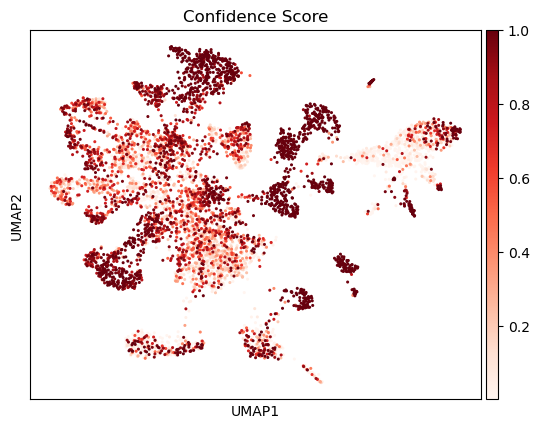

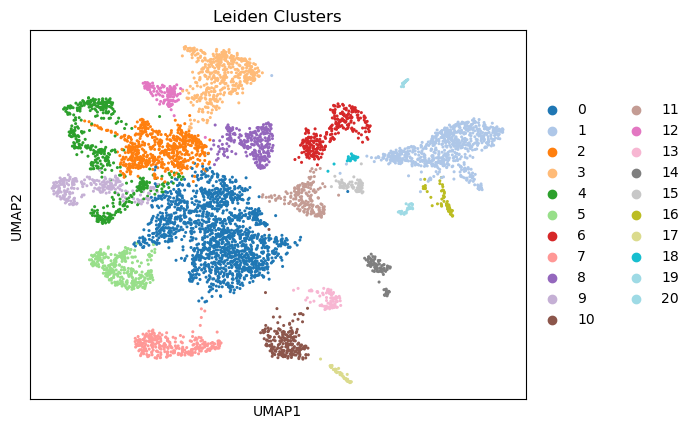

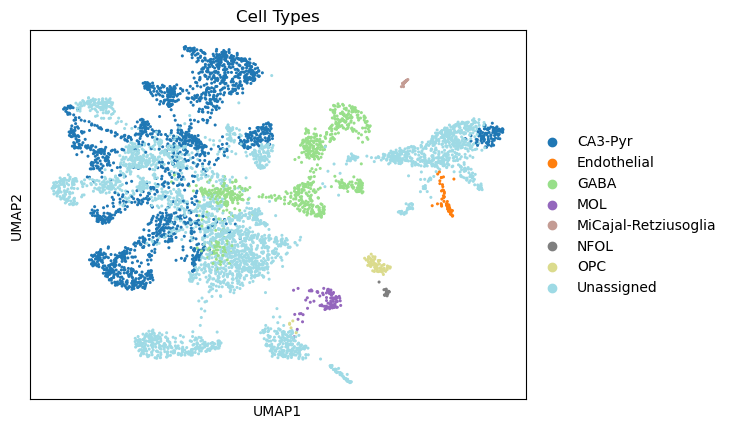

In [8]:
# Save the UMAP plot to the output directory
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# prob_conf_score - use a sequential colormap (Reds)
sc.pl.umap(adata, color='prob_conf_score', ax=axs[0], show=False, cmap='Reds', title='Confidence Score')

# leiden_0.38 - use a categorical palette
sc.pl.umap(adata, color='leiden_0.38', ax=axs[1], show=False, palette='tab20', title='Leiden Clusters')

# majority_voting - use a categorical palette
sc.pl.umap(adata, color='majority_voting', ax=axs[2], show=False, palette='tab20', title='Cell Types')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"{SAMPLE_NAME}_umap.png"), dpi=300, bbox_inches='tight')
plt.close()

# Display for notebook - individual plots with proper coloring
sc.pl.umap(adata, color='prob_conf_score', cmap='Reds', title='Confidence Score')
sc.pl.umap(adata, color='leiden_0.38', palette='tab20', title='Leiden Clusters')
sc.pl.umap(adata, color='majority_voting', palette='tab20', title='Cell Types')

In [9]:
cell_types = gene_list.columns.tolist()
print(cell_types)

['Excitatory neurons', 'Inhibitory neurons', 'Astrocytes', 'Microglia', 'Oligos', 'Endothelial cells', 'Ependymal cells', 'Neuroblast/progenitors']


In [10]:
markers_dict = {col: gene_list[col].dropna().tolist() for col in gene_list.columns}
markers_dict

{'Excitatory neurons': ['Slc17a7', 'Slc17a6', 'Camk2a', 'Grin1', 'Gria1'],
 'Inhibitory neurons': ['Gad1', 'Gad2', 'Slc32a1', 'Syt6', 'Erbb4'],
 'Astrocytes': ['Aldh1l1', 'Gfap', 'Aqp4', 'Slc1a2', 'Sox9'],
 'Microglia': ['Aif1', 'Csf1r', 'Cx3cr1', 'P2ry12', 'Hexb'],
 'Oligos': ['Mbp', 'Olig1', 'Olig2', 'Mog', 'Plp1'],
 'Endothelial cells': ['Cldn5', 'Cxcl12', 'Pdgfrb', 'Cspg4', 'Efemp1'],
 'Ependymal cells': ['Foxj1', 'Tuba1a', 'Prom1', 'Nes', 'Calml4'],
 'Neuroblast/progenitors': ['Sox4', 'Eomes', 'Sox2', 'Nfib', 'Neurod2']}

In [11]:
# Update plot_marker_genes function call to save plots to the output directory
def plot_marker_genes_with_save(adata, cell_type, markers_dict, output_dir):
    """Modified plotting function that saves plots to specified directory"""
    markers = markers_dict[cell_type]
    
    # Check which markers are in the dataset
    available_markers = [m for m in markers if m in adata.var_names]
    
    if not available_markers:
        print(f"Warning: None of the markers for {cell_type} are in the dataset")
        return
    
    # Replace slashes in cell type name with hyphens for filenames
    safe_cell_type = cell_type.replace('/', '-')
    
    # Calculate grid layout
    n_markers = len(available_markers)
    n_cols = min(3, n_markers)  # Max 3 columns
    n_rows = (n_markers + n_cols - 1) // n_cols  # Ceiling division
    
    # Create a single figure for all markers of this cell type
    fig = plt.figure(figsize=(n_cols * 4, n_rows * 4))
    
    for i, marker in enumerate(available_markers):
        print(f"Plotting {marker} for {cell_type}")
        ax = plt.subplot(n_rows, n_cols, i + 1)
        sc.pl.umap(adata, color=marker, title=f"{marker}", 
                  cmap='Reds', show=False, ax=ax)
    
    # Add a main title for the entire figure
    plt.suptitle(f"Marker genes for {cell_type}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust to make room for suptitle
    
    # Save the combined figure
    plt.savefig(os.path.join(output_dir, f"{safe_cell_type}_markers_combined.png"), 
                dpi=300, bbox_inches='tight')
    plt.close()
    
    # Also display in notebook - this uses scanpy's built-in multi-panel plot
    print(f"Showing combined plot for {cell_type} markers:")
    sc.pl.umap(adata, color=available_markers, ncols=n_cols, cmap='Reds')

Processing Excitatory neurons
Plotting Slc17a7 for Excitatory neurons
Plotting Slc17a6 for Excitatory neurons
Plotting Camk2a for Excitatory neurons
Plotting Grin1 for Excitatory neurons
Plotting Gria1 for Excitatory neurons


Showing combined plot for Excitatory neurons markers:


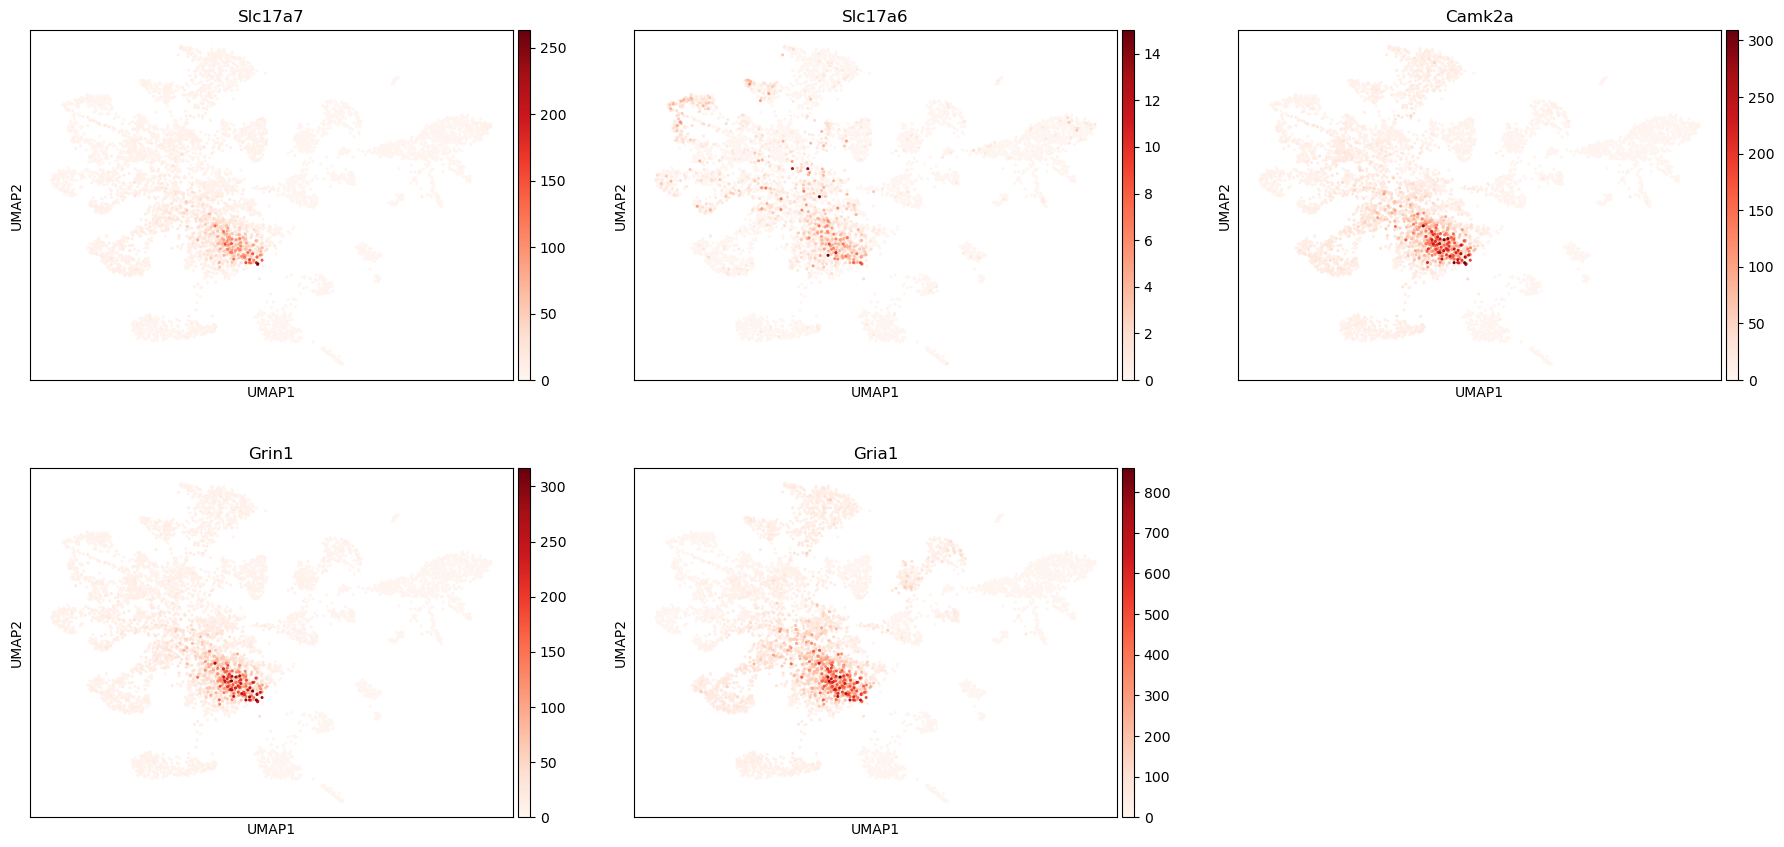

Processing Inhibitory neurons
Plotting Gad1 for Inhibitory neurons
Plotting Gad2 for Inhibitory neurons
Plotting Slc32a1 for Inhibitory neurons
Plotting Syt6 for Inhibitory neurons
Plotting Erbb4 for Inhibitory neurons


Showing combined plot for Inhibitory neurons markers:


<Figure size 1200x600 with 0 Axes>

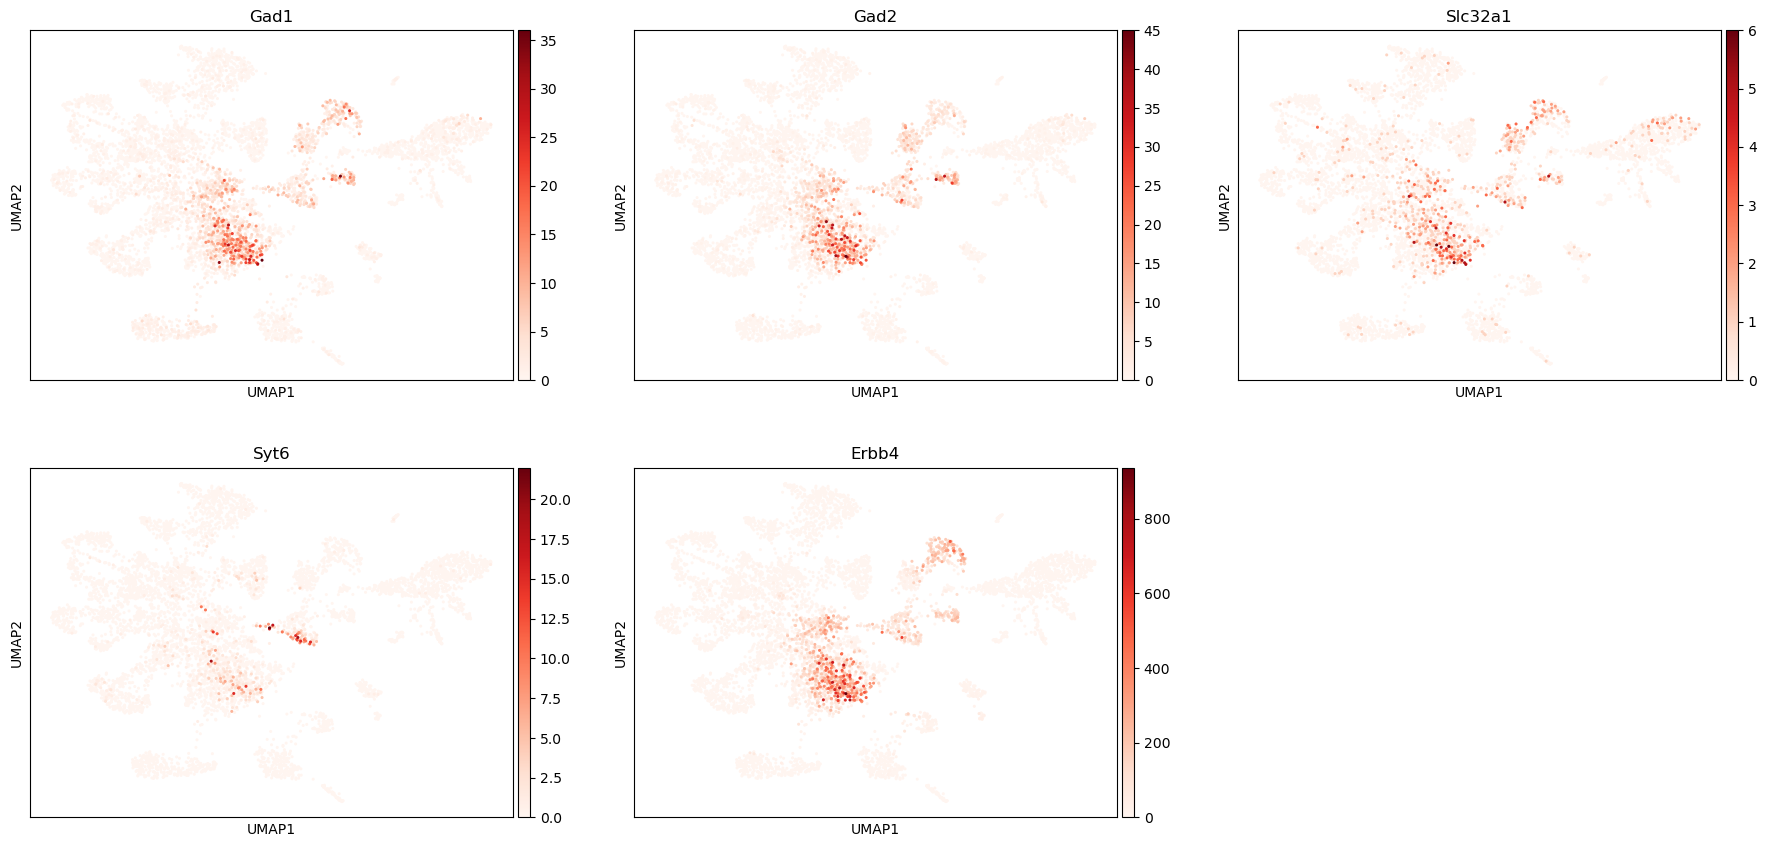

Processing Astrocytes
Plotting Aldh1l1 for Astrocytes
Plotting Gfap for Astrocytes
Plotting Aqp4 for Astrocytes
Plotting Slc1a2 for Astrocytes
Plotting Sox9 for Astrocytes


Showing combined plot for Astrocytes markers:


<Figure size 1200x600 with 0 Axes>

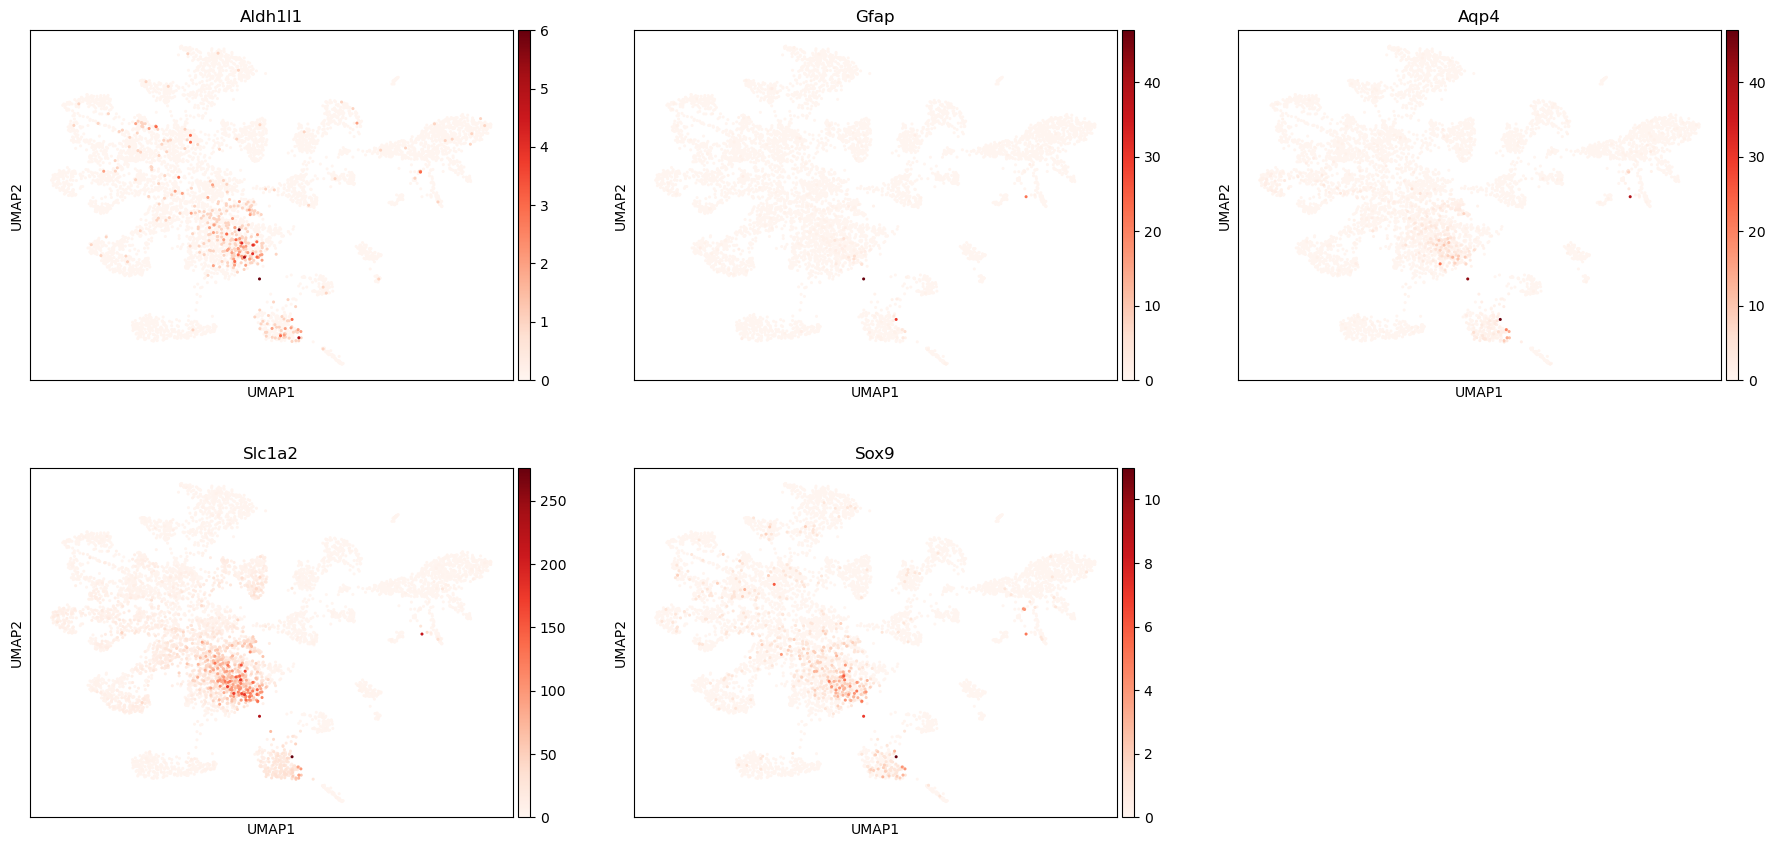

Processing Microglia
Plotting Aif1 for Microglia
Plotting Csf1r for Microglia
Plotting Cx3cr1 for Microglia
Plotting P2ry12 for Microglia
Plotting Hexb for Microglia


Showing combined plot for Microglia markers:


<Figure size 1200x600 with 0 Axes>

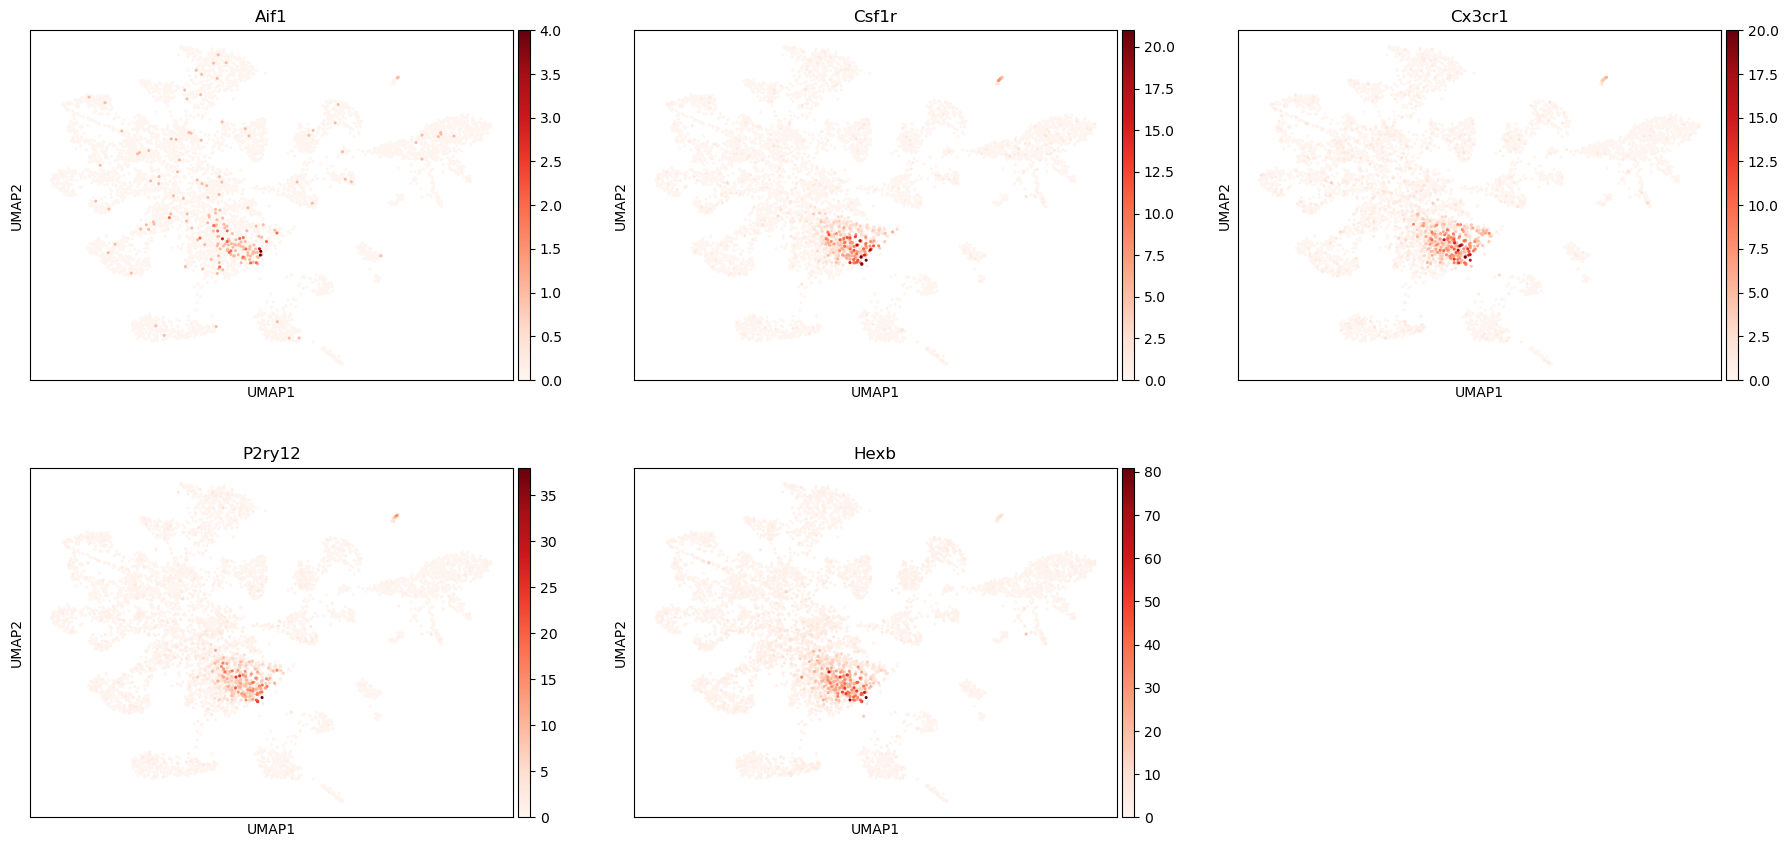

Processing Oligos
Plotting Mbp for Oligos
Plotting Olig1 for Oligos
Plotting Olig2 for Oligos
Plotting Mog for Oligos
Plotting Plp1 for Oligos


Showing combined plot for Oligos markers:


<Figure size 1200x600 with 0 Axes>

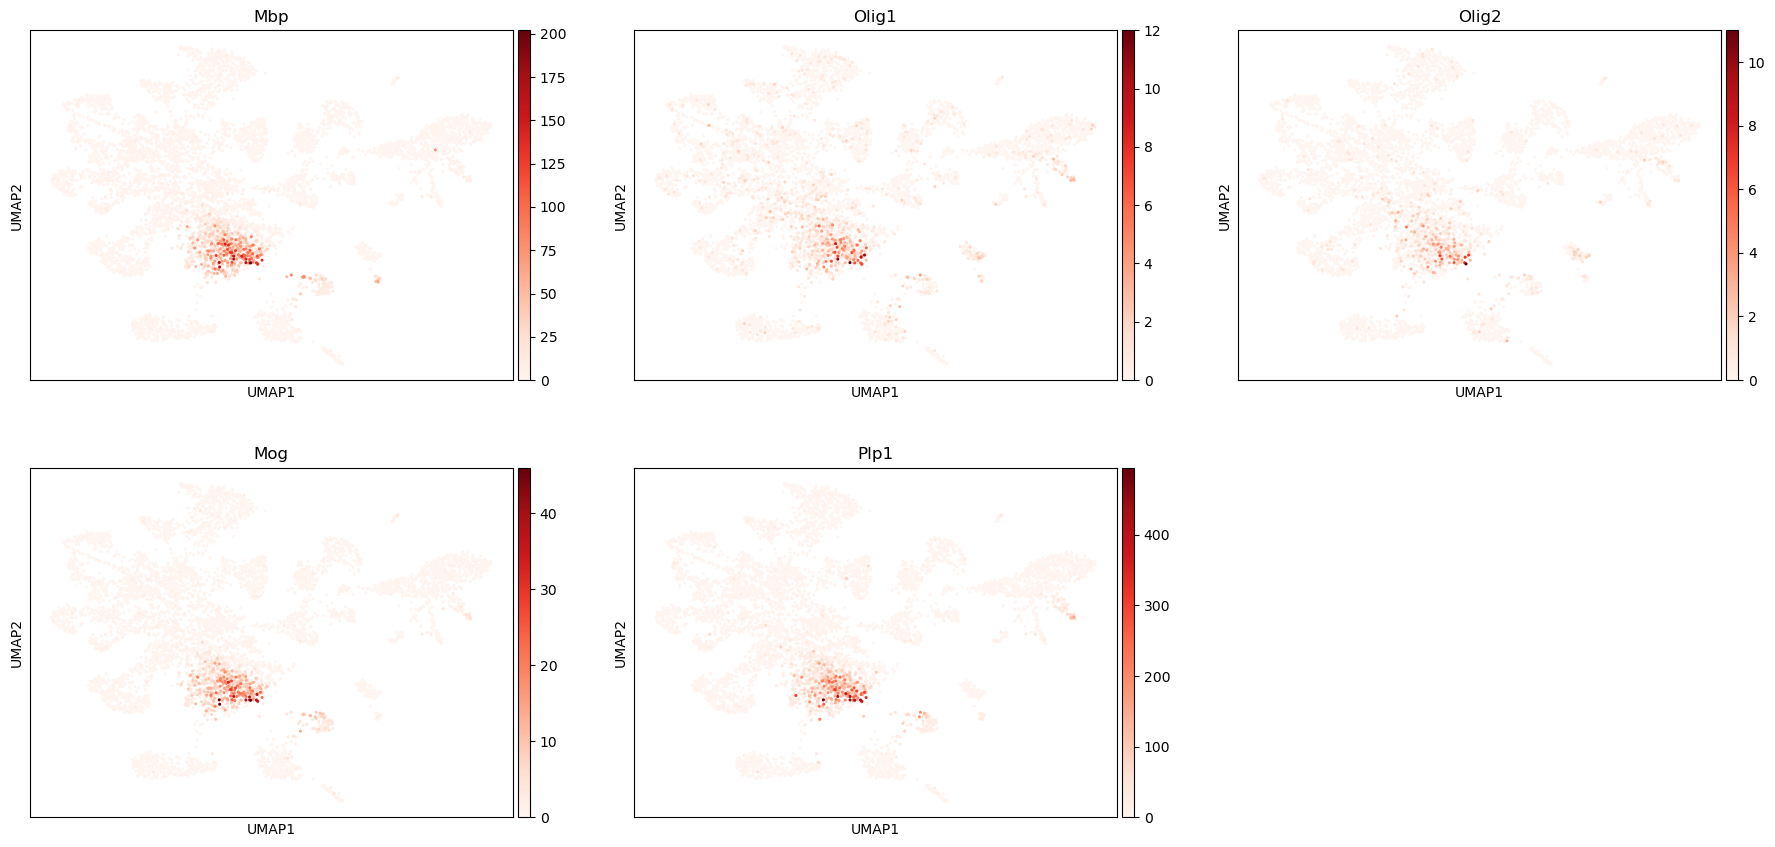

Processing Endothelial cells
Plotting Cldn5 for Endothelial cells
Plotting Cxcl12 for Endothelial cells
Plotting Pdgfrb for Endothelial cells
Plotting Cspg4 for Endothelial cells
Plotting Efemp1 for Endothelial cells


Showing combined plot for Endothelial cells markers:


<Figure size 1200x600 with 0 Axes>

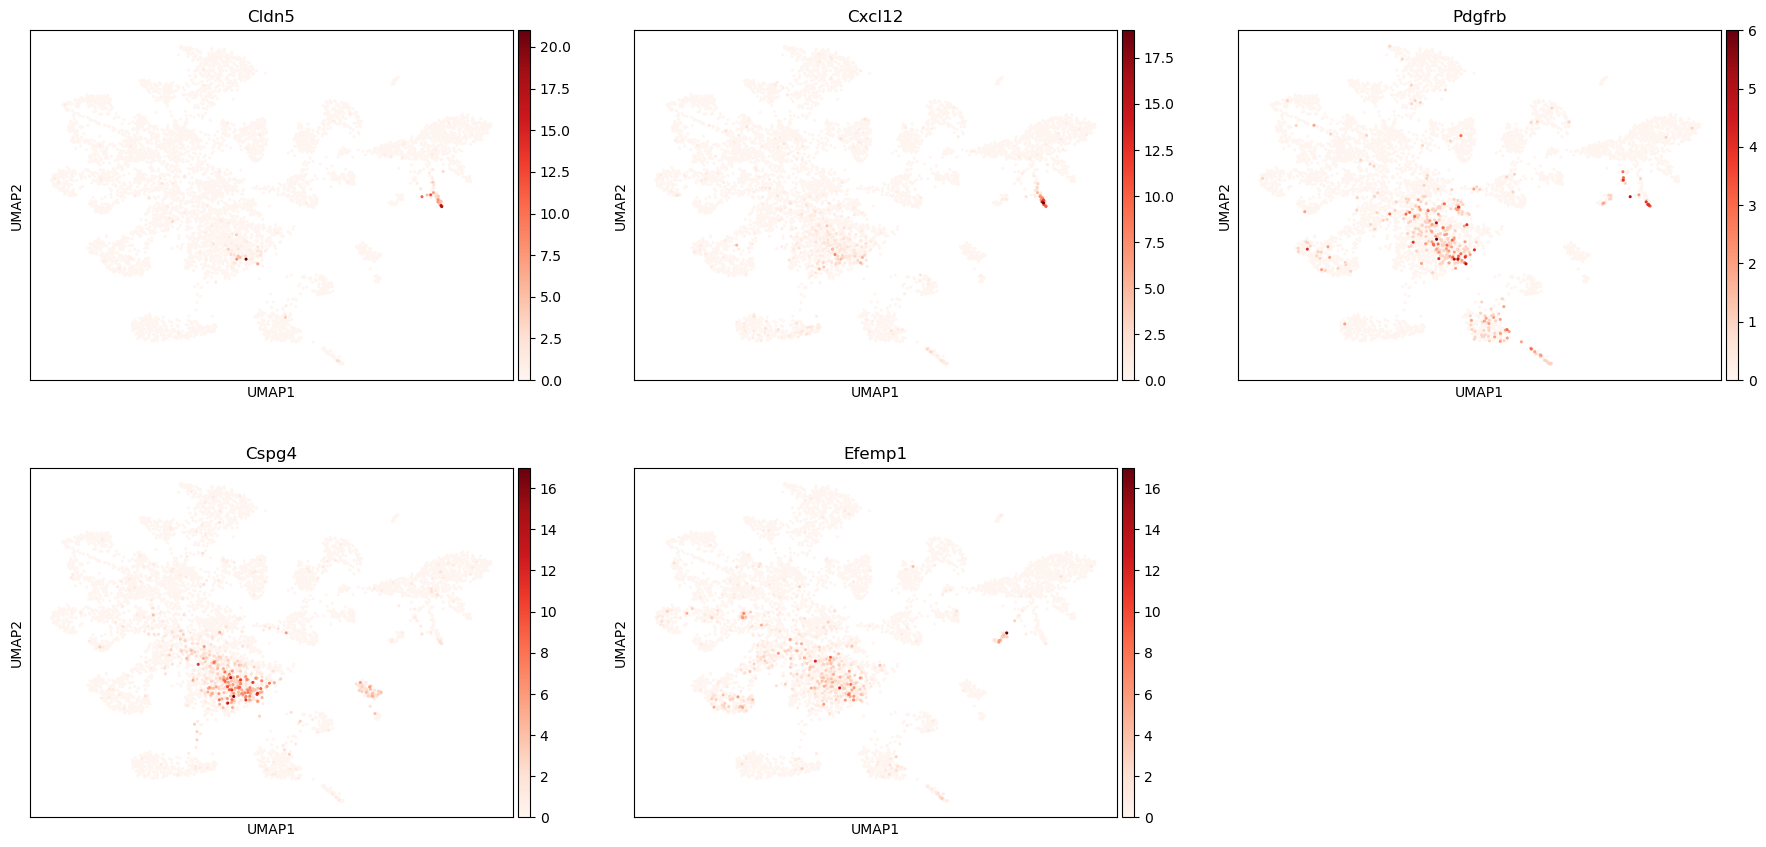

Processing Ependymal cells
Plotting Foxj1 for Ependymal cells
Plotting Tuba1a for Ependymal cells
Plotting Prom1 for Ependymal cells
Plotting Nes for Ependymal cells
Plotting Calml4 for Ependymal cells


Showing combined plot for Ependymal cells markers:


<Figure size 1200x600 with 0 Axes>

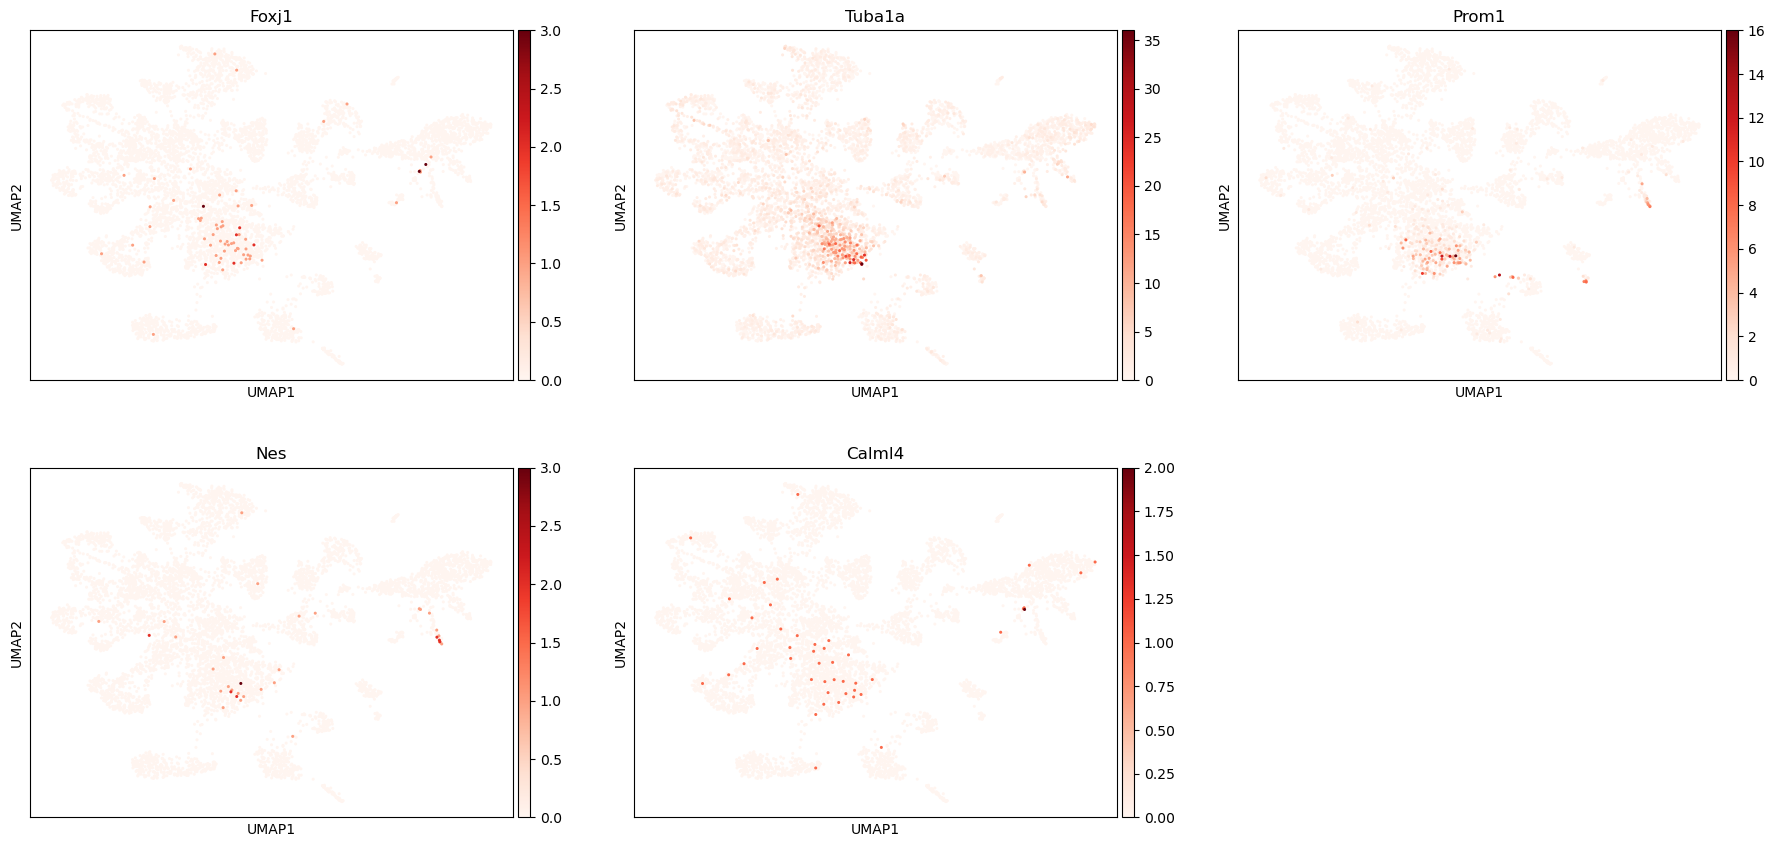

Processing Neuroblast/progenitors
Plotting Sox4 for Neuroblast/progenitors
Plotting Eomes for Neuroblast/progenitors
Plotting Sox2 for Neuroblast/progenitors
Plotting Nfib for Neuroblast/progenitors
Plotting Neurod2 for Neuroblast/progenitors


Showing combined plot for Neuroblast/progenitors markers:


<Figure size 1200x600 with 0 Axes>

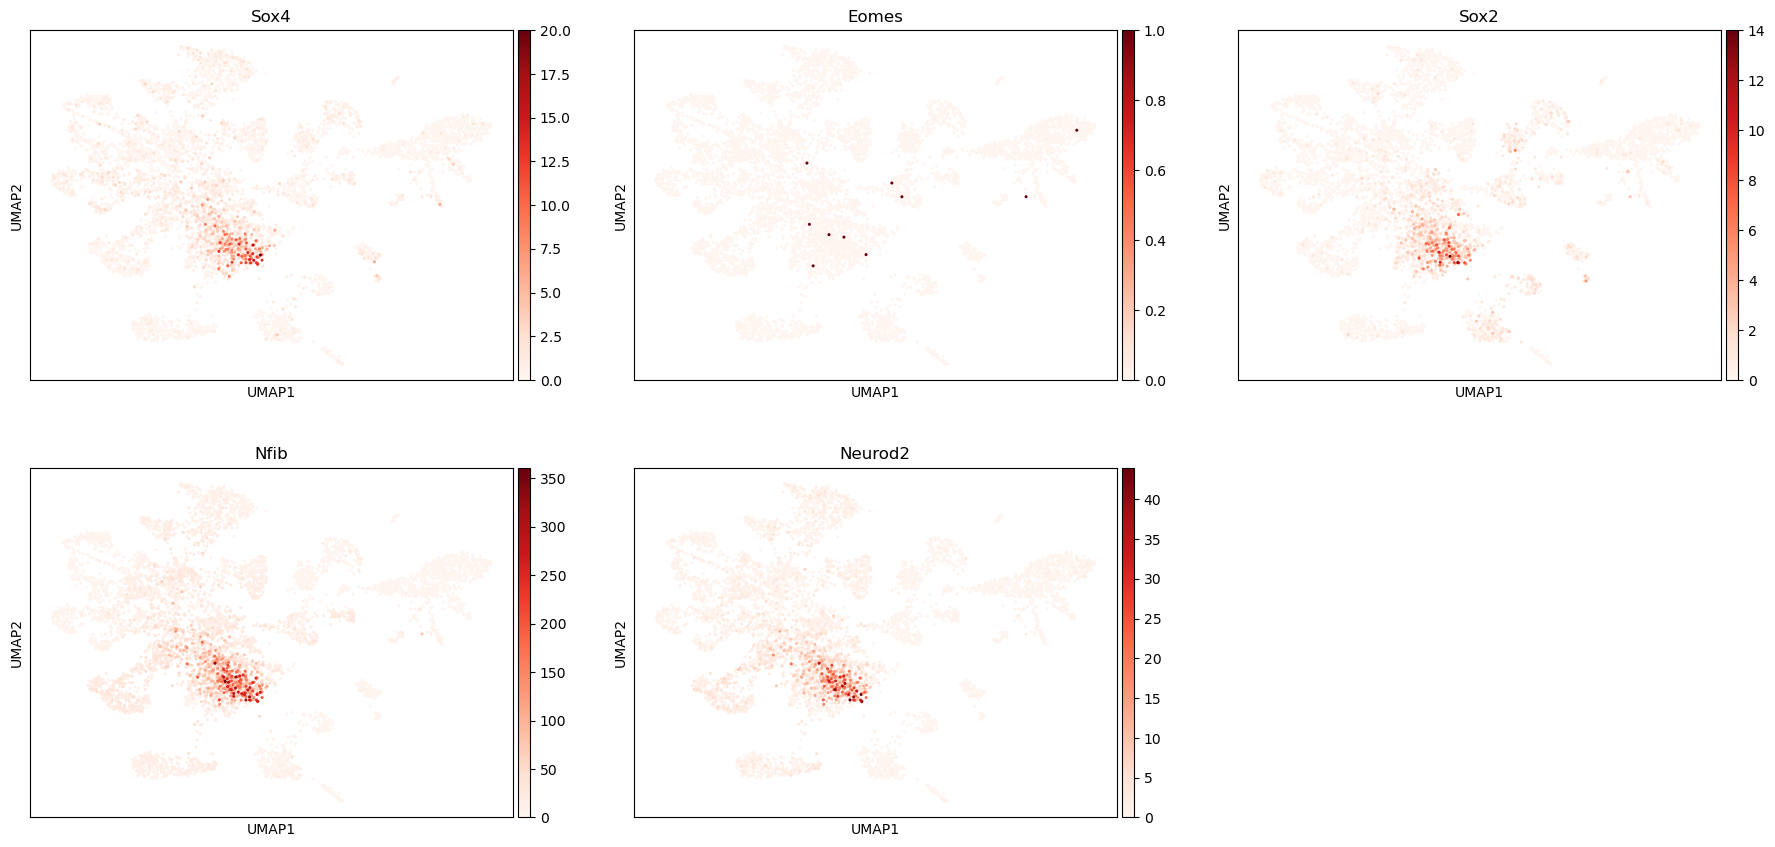

<Figure size 1200x600 with 0 Axes>

In [12]:
for selected_cell_type in markers_dict.keys():
    print(f"Processing {selected_cell_type}")
    plot_marker_genes_with_save(adata, selected_cell_type, markers_dict, OUTPUT_DIR)
    
    # Also save summary plot for this cell type 
    available_markers = [m for m in markers_dict[selected_cell_type] if m in adata.var_names]
    if available_markers:
        # Replace slashes in cell type name with hyphens for filenames
        safe_cell_type = selected_cell_type.replace('/', '-')
        
        # Get a dotplot of all markers for this cell type
        plt.figure(figsize=(12, 6))
        sc.pl.dotplot(adata, available_markers, groupby='majority_voting', 
                      title=f"{selected_cell_type} markers", show=False)
        plt.savefig(os.path.join(OUTPUT_DIR, f"{safe_cell_type}_dotplot.png"), 
                    dpi=300, bbox_inches='tight')
        plt.close()

In [13]:
# Save the final results as an annotated h5ad file
adata.write_h5ad(os.path.join(OUTPUT_DIR, f"{SAMPLE_NAME}_analyzed.h5ad"))

# Generate a simple summary report
with open(os.path.join(OUTPUT_DIR, f"{SAMPLE_NAME}_summary.txt"), 'w') as f:
    f.write(f"Analysis summary for {SAMPLE_NAME} with model {Mouse_Dentate_Gyrus}\n")
    f.write(f"Total cells: {adata.n_obs}\n")
    f.write(f"Total genes: {adata.n_vars}\n")
    f.write("\nCell type distribution:\n")
    cell_type_counts = adata.obs['majority_voting'].value_counts()
    for cell_type, count in cell_type_counts.items():
        f.write(f"{cell_type}: {count} cells ({count/adata.n_obs:.2%})\n")

print(f"Analysis complete for {SAMPLE_NAME}. Results saved to {OUTPUT_DIR}")





Analysis complete for Emx1_Mut. Results saved to /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/check_markers/results/Mouse_Dentate_Gyrus/Emx1_Mut
